<a href="https://colab.research.google.com/github/SHANJAY975/CODSOFT/blob/main/Sales_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sales Price Prediction

# Importing the Libraries

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Importing the Dataset

In [110]:
df = pd.read_csv("advertising.csv")
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


# Exploring the Dataset

In [111]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [112]:
df.shape

(200, 4)

In [113]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


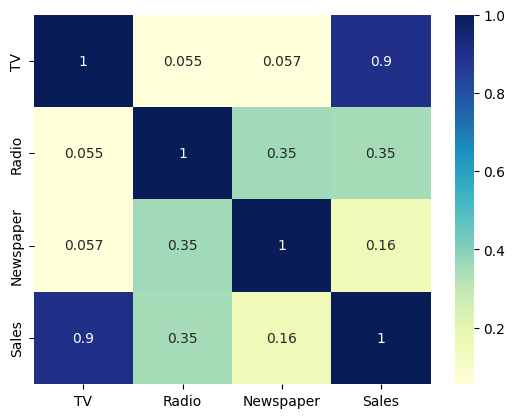

In [114]:
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()

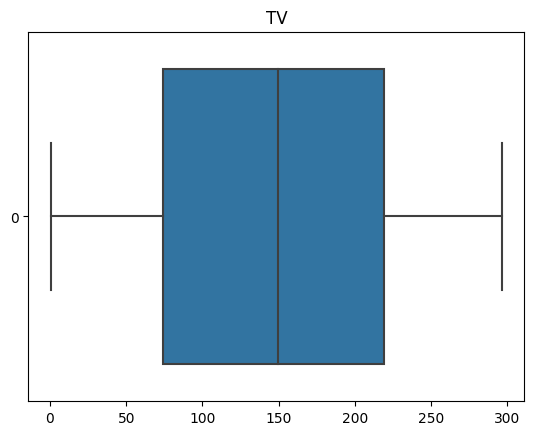

In [115]:
sns.boxplot(df['TV'],orient='h')
plt.title('TV')
plt.show()

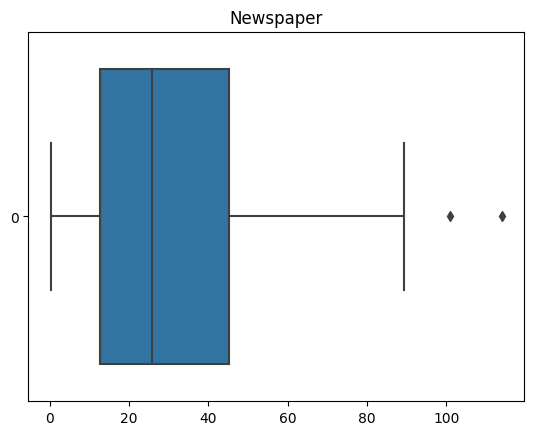

In [116]:
sns.boxplot(df['Newspaper'],orient='h')
plt.title('Newspaper')
plt.show()

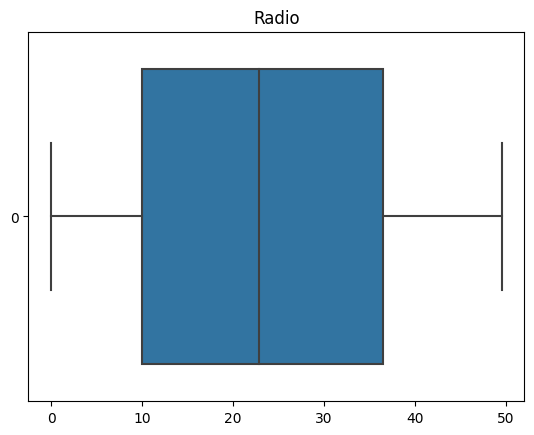

In [117]:
sns.boxplot(df['Radio'],orient='h')
plt.title('Radio')
plt.show()

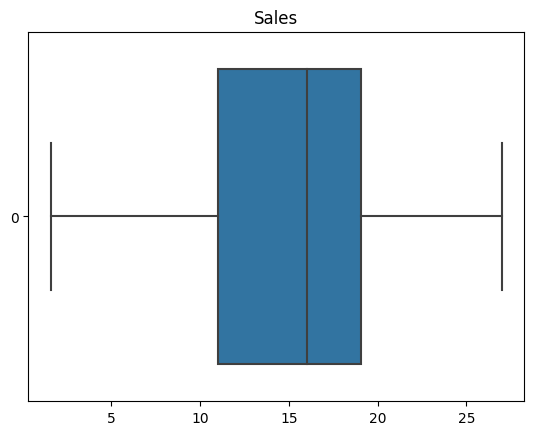

In [118]:
sns.boxplot(df['Sales'],orient='h')
plt.title('Sales')
plt.show()

# Data PreProcessing

In [122]:
n_columns = df.shape[1]

In [124]:
from sklearn.preprocessing import StandardScaler
sc = []
for i in range(n_columns-1):
    sc.append(StandardScaler())
    df.iloc[:,i] = sc[-1].fit_transform(np.array(df.iloc[:,i]).reshape(-1,1))

In [125]:
df

,TV,Radio,Newspaper,Sales
0,0.969852,0.981522,1.778945,22.1
1,-1.197376,1.082808,0.669579,10.4
2,-1.516155,1.528463,1.783549,12.0
3,0.052050,1.217855,1.286405,16.5
4,0.394182,-0.841614,1.281802,17.9
...,...,...,...,...
195,-1.270941,-1.321031,-0.771217,7.6
196,-0.617035,-1.240003,-1.033598,14.0
197,0.349810,-0.942899,-1.111852,14.8
198,1.594565,1.265121,1.640850,25.5


# Splitting the Dataset

In [129]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [130]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size = 1/3)

In [131]:
X_train[:5,:]

array([[-1.50798117,  0.96801776, -0.41216886],
       [-1.04557682,  0.64390467, -0.32470841],
       [ 0.96284614,  0.61014289,  2.00910454],
       [-0.57850171, -1.05768905, -1.07502697],
       [ 0.0310313 ,  0.83297064, -1.13026515]])

In [132]:
X_test[:5,:]

array([[-0.13828342,  1.24486436,  0.70640421],
       [-0.18615862,  1.31914027, -0.07613662],
       [-0.66958136, -0.90238486,  0.23687971],
       [-0.91829885,  1.43393033,  0.23227653],
       [ 0.73047627, -0.17988276, -0.91391563]])

# Training and Predicting

LinearRegression

In [133]:
model1 = LinearRegression()
model1.fit(X_train,y_train)

LinearRegression()

In [134]:
model1_prediction = model1.predict(X_test)

In [135]:
model1_prediction = model1_prediction.round(decimals = 1)

In [136]:
model1_prediction

array([16.5, 16.4, 10.4, 13.1, 18.4, 18.2, 10.9,  8.5,  9.2, 18.8,  7.9,
       15.6, 25. ,  9.4, 14.1, 17. , 22.9,  5.8, 21.5, 15.3, 17.2,  9.6,
       10.8, 22.1, 11.6,  9.5, 23.4, 15.8, 18.4,  9.8, 19.5,  8.6,  5. ,
       14.6, 21.3,  9.9,  7.6, 15.9, 17.6, 16.5, 11.3, 12.8, 18.2, 15.1,
       21.5, 20.9, 19. , 10.3, 23.9, 10.6,  8.8, 16.6, 13.7, 12.4, 19.1,
       14.4, 12.1,  9.7, 17.2, 21.3, 14.7, 15. , 24.9, 21.1, 19.7, 10.5,
       19.5])

In [137]:
y_test

array([17.2, 16. , 10.6, 13.6, 20.9, 16.6, 10.9,  8.5,  9.7, 19.8,  5.3,
       15. , 23.8, 12. , 13.2, 16.9, 20.8,  3.2, 17.4, 14.8, 16.7,  9.6,
       11.3, 21.8, 11.8,  9.2, 25.4, 15.6, 16. , 11.9, 17.7, 12.6,  4.8,
       16.7, 21.5, 13.2,  7.6, 17.1, 18. , 17.2, 12.3, 10.1, 17.5, 15.2,
       20. , 17.6, 17.1, 12. , 21.4, 10.8, 11.9, 16.1, 12.9, 12.6, 17. ,
       15.3, 12.5, 10.1, 15. , 18.9, 17.6, 16. , 25.5, 22.6, 20.9, 11.3,
       18.4])

In [148]:
model2 = SVR()

param_grid = {'C': [0.1 , 1 , 10, 20 , 50 , 75, 100], 'kernel': ['linear', 'rbf']}
grid_search = GridSearchCV(estimator=model2, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_


best_model = grid_search.best_estimator_
accuracy = best_model.score(X_test, y_test)


print("Best Hyperparameters:", best_params)
print("Best Score:", best_score)
print("Accuracy on Testing Data:", accuracy)

Best Hyperparameters: {'C': 50, 'kernel': 'rbf'}
Best Score: 0.9410540411315864
Accuracy on Testing Data: 0.8646970404951488


# Evaluation of model 1

In [138]:
MSE = mean_squared_error(y_test, model1_prediction)

In [139]:
MSE

2.7420895522388054

In [140]:
r_squared = r2_score(y_test, model1_prediction)
r_squared

0.8759937733143078

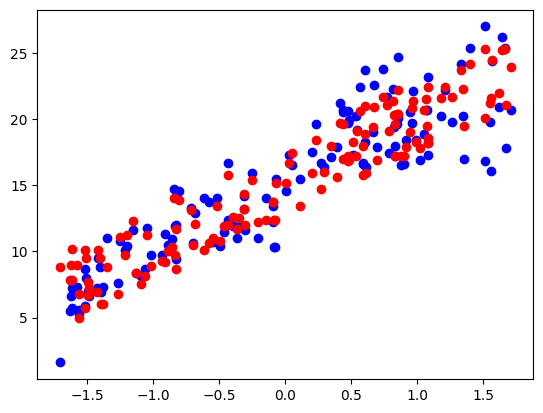

In [142]:
plt.scatter(X_train[:,0],y_train, c='b')
plt.scatter(X_train[:,0], model1.predict(X_train).round(decimals = 1), c='r')
plt.show()